# Preliminary data analysis - Blood Donations in FVG

Now that the data is cleaned and ready to be analyzed, it's possible to begin with some basic tasks.

### Dataframe importing

First of all, let's import the needed libraries and the dataset:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

combined_dataframe = pd.read_csv('../../DATA/FINAL/dataframe_cleaned.csv')

# Verifying every NaN has been removed:
print(combined_dataframe.isnull().sum())

# Printing the first couple lines to check the dataset's format:
combined_dataframe.head()

donor_class              0
donation_type            0
birth_year               0
birth_cohort             0
first_donation_year      0
first_donation_cohort    0
number_of_donations      0
gender                   0
year                     0
age                      0
unique_number            0
dtype: int64


,donor_class,donation_type,birth_year,birth_cohort,first_donation_year,first_donation_cohort,number_of_donations,gender,year,age,unique_number
0,O,SANGUE,1980.0,1980.0,2009.0,2005.0,1.0,F,2009.0,29.0,26934057.0
1,P,PLASMAF,1980.0,1980.0,2005.0,2005.0,5.0,M,2009.0,29.0,26826075.0
2,P,PLASMAF,1980.0,1980.0,2005.0,2005.0,5.0,M,2009.0,29.0,26826075.0
3,P,PLASMAF,1980.0,1980.0,2005.0,2005.0,5.0,M,2009.0,29.0,26826075.0
4,P,PLASMAF,1980.0,1980.0,2005.0,2005.0,5.0,M,2009.0,29.0,26826075.0


## Gender Distribution

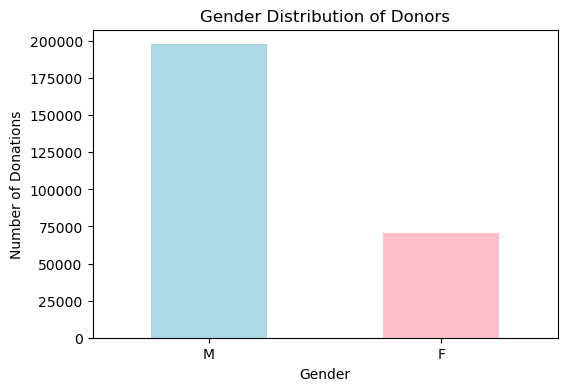

gender
M    197761
F     70769
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Counting the number of male and female donors:
gender_counts = combined_dataframe["gender"].value_counts()

# Plotting the gender distribution:
plt.figure(figsize=(6, 4))
gender_counts.plot(kind="bar", color=["lightblue", "pink"])
plt.title("Gender Distribution of Donors")
plt.xlabel("Gender")
plt.ylabel("Number of Donations")
plt.xticks(rotation=0)
plt.show()

# Showing the raw numbers of male and female donors:
print(gender_counts)

The plot shows how the gender of donators is for the vast majority of males, almost three times as many as females.

## Age Distribution

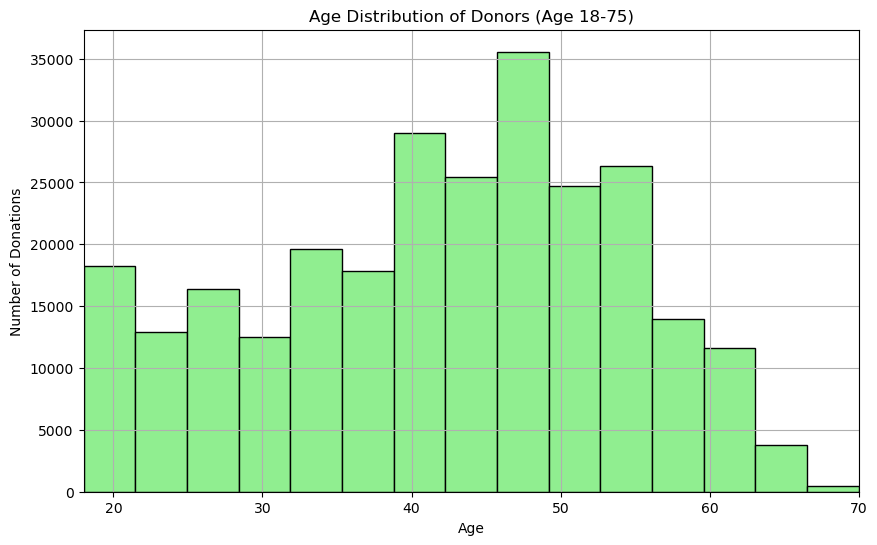

Average donor age: 41.95


In [ ]:
# Plotting the age distribution for donors:
plt.figure(figsize=(10, 6))
combined_dataframe["age"].hist(bins=30, color="lightgreen", edgecolor="black")
plt.title("Age Distribution of Donors (Age 18-75)")
plt.xlabel("Age")
plt.ylabel("Number of Donations")

# Set the x-axis limit to start at 18 and end at 70 - it's impossible to donate outside this age gap in Italy: 
plt.xlim(18, 70)

plt.show()

# Printing the average age:
print(f"Average donor age: {combined_dataframe["age"].mean():.2f}")

## Number of Donations per Donor

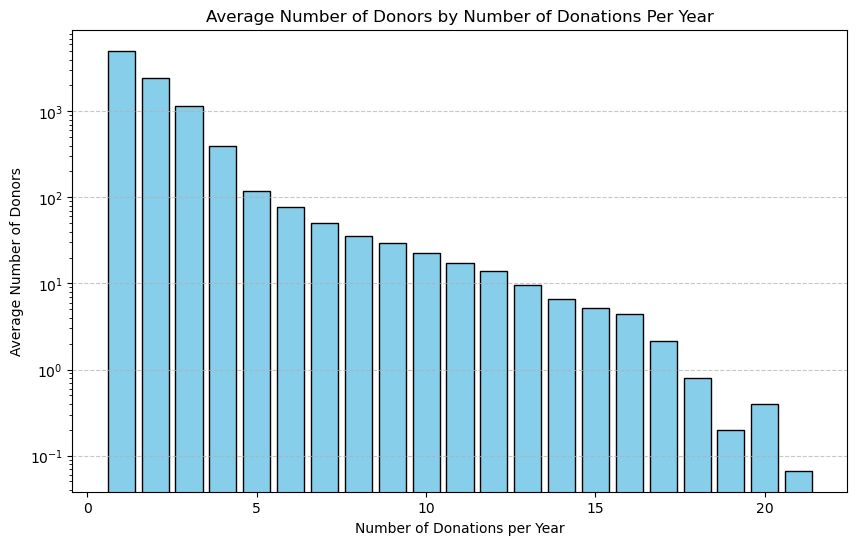

In [11]:
# Grouping the data by unique_number and year to calculate the number of donations per donor per year:
donations_per_donor_per_year = combined_dataframe.groupby(['unique_number', 'year']).size().reset_index(name='num_donations')

# Grouping by 'num_donations' to count how many donors donated a specific number of times, then average across years:
average_donations = donations_per_donor_per_year.groupby('num_donations').size().reset_index(name='num_people')
average_donations['num_people'] = average_donations['num_people'] / len(donations_per_donor_per_year['year'].unique())

# Plotting the average number of donors who donated a certain number of times:
plt.figure(figsize=(10, 6))
plt.bar(average_donations['num_donations'], average_donations['num_people'], color='skyblue', edgecolor='black')
plt.title('Average Number of Donors by Number of Donations Per Year')
plt.xlabel('Number of Donations per Year')
plt.ylabel('Average Number of Donors')
plt.yscale('log') # this will change in later patches
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

TODO change tis plot to make it more readable

## Type of donations

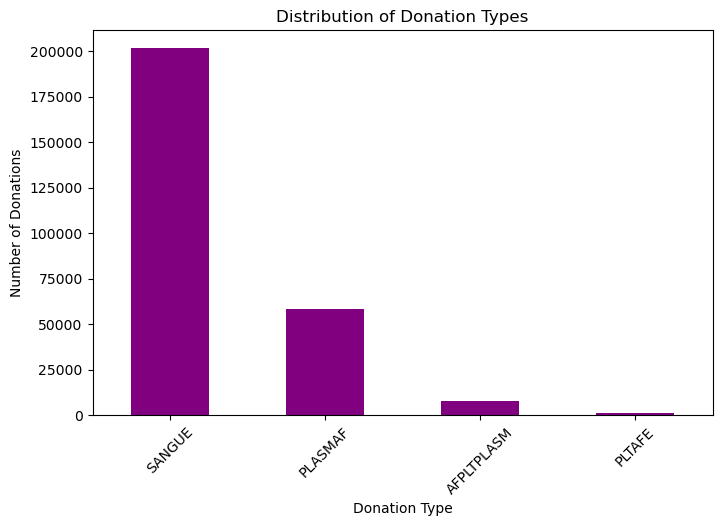

In [ ]:
donation_type_counts = combined_dataframe["donation_type"].value_counts()

plt.figure(figsize=(8, 5))
donation_type_counts.plot(kind="bar", color="purple")
plt.title("Distribution of Donation Types")
plt.xlabel("Donation Type")
plt.ylabel("Number of Donations")
plt.xticks(rotation=45)
plt.show()